# 10. Pandas

## Exploring Historical Stock Prices

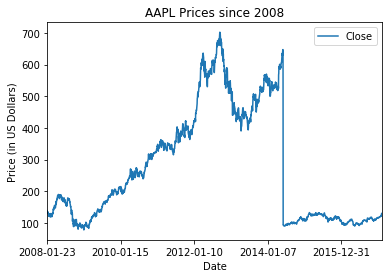

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csvfile = pd.read_csv("../AAPL_2008-2017.csv")
plott = csvfile.plot(x="Date", y = "Close")
plott.set_xlabel("Date")
plott.set_ylabel("Price (in US Dollars)")
plott.set_title("AAPL Prices since 2008")
plt.show()


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csvfile = pd.read_csv("../AAPL_2008-2017.csv")
csvfile["Return"] = csvfile["Close"].pct_change(1)

In [7]:
csvfile["Return"].std(0)

0.02688156386454594

In [8]:
best = 0
worst = 100
for index, imitem in csvfile["Close"].iteritems():
    if (imitem > best):
        best = imitem
    elif (worst >= imitem):
        worst = imitem

        
date_best = csvfile[(csvfile["Close"]==best)]["Date"]
print("Best: ", date_best.item())
date_worst = csvfile[(csvfile["Close"]==worst)]["Date"]
print("Worst: ", date_worst.item())

Best:  2012-09-19
Worst:  2009-01-20


In [9]:
# d) TODO

## 10.2: Exploring Alcohol Consumptions Across Nations

In [11]:
df = pd.read_csv("../alcohol.csv")
africa = df[df["continent"] == "AF"]
africa = africa.filter(items = ["country", "beer_servings"])
maxbeer = africa.loc[africa['beer_servings'].idxmax()]
print(maxbeer["country"])

Namibia


In [12]:
# more than 50 servings of beer
over_fifty = df[df["beer_servings"] > 50]
print(over_fifty["country"])

1                           Albania
3                           Andorra
4                            Angola
5                 Antigua & Barbuda
6                         Argentina
8                         Australia
9                           Austria
11                          Bahamas
14                         Barbados
15                          Belarus
16                          Belgium
17                           Belize
20                          Bolivia
21               Bosnia-Herzegovina
22                         Botswana
23                           Brazil
25                         Bulgaria
27                          Burundi
29                       Cabo Verde
30                         Cambodia
31                         Cameroon
32                           Canada
35                            Chile
36                            China
37                         Colombia
39                            Congo
41                       Costa Rica
42                          

In [13]:
# more than 50 servings of spirit
over_fifty = df[df["spirit_servings"] > 50]
print(over_fifty["country"])

1                           Albania
3                           Andorra
4                            Angola
5                 Antigua & Barbuda
7                           Armenia
8                         Australia
9                           Austria
11                          Bahamas
12                          Bahrain
14                         Barbados
15                          Belarus
16                          Belgium
17                           Belize
21               Bosnia-Herzegovina
23                           Brazil
25                         Bulgaria
29                       Cabo Verde
30                         Cambodia
32                           Canada
35                            Chile
36                            China
37                         Colombia
40                     Cook Islands
41                       Costa Rica
42                          Croatia
43                             Cuba
44                           Cyprus
45                   Czech R

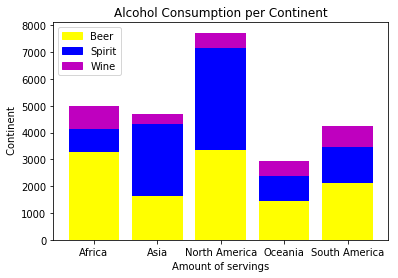

In [15]:
# ORDER: AFRICA ASIA EUROPE NORTH AMERICA OCEANIA SOUTHAMERICA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
df = pd.read_csv("../alcohol.csv")
asia = df[df["continent"] == "AS"]
oceania = df[df["continent"] == "OC"]
africa = df[df["continent"] == "AF"]
europe = df[df["continent"] == "EU"]
sa = df[df["continent"] == "SA"]
na = df[df["continent"] == "NAM"]
beerbar = [africa["beer_servings"].sum(), asia["beer_servings"].sum(), na["beer_servings"].sum(), oceania["beer_servings"].sum(), sa["beer_servings"].sum()]
spiritbar = [africa["spirit_servings"].sum(), asia["spirit_servings"].sum(), na["spirit_servings"].sum(), oceania["spirit_servings"].sum(), sa["spirit_servings"].sum()]
winebar = [africa["wine_servings"].sum(), asia["wine_servings"].sum(), na["wine_servings"].sum(), oceania["wine_servings"].sum(), sa["wine_servings"].sum()]
x = ["Africa", "Asia", "North America", "Oceania", "South America"]
plt.bar(x, beerbar, color = "yellow")
plt.bar(x, spiritbar, color = "blue", bottom=beerbar)
plt.bar(x, winebar, color = "m", bottom = list(map(lambda x, y: x+y, beerbar, spiritbar)))
plt.title("Alcohol Consumption per Continent")
plt.xlabel("Amount of servings")
plt.ylabel(" Continent")
beerpatch = mpatches.Patch(color="yellow", label = "Beer")
spiritpatch = mpatches.Patch(color = "blue", label = "Spirit")
winepatch = mpatches.Patch(color = "m", label = "Wine")
plt.legend(handles = [beerpatch, spiritpatch, winepatch], loc = "upper left")
plt.show()